The code to draw a heatmap with clustering

In [2]:
import pandas as pd

id62_0' : 'CDDP', 'id60_3' : 'CPT','id47_1' : '5FU','id45_1' : 'CKI', 'id107_0' :'TSA', 'id105_15' :'LPS', 'id53_1' :'AIL'  
Here, id is gr_ID in Sup_Table_RNAseq_sets_for_screening.xlsx

In [3]:
# obtain the data

# PUM1 down-regulated i.e. PUM1-fold change < -1.0 or PUM1-fold change <-0.5 + PUM1-targets > 5
id62_0 = pd.read_table("C:/research/RNAseq_database/RNAseq_data/62_0.txt")
id60_3 = pd.read_table("C:/research/RNAseq_database/RNAseq_data/60_3.txt")
id47_1 = pd.read_table("C:/research/RNAseq_database/RNAseq_data/47_1.txt")
id107_0 = pd.read_table("C:/research/RNAseq_database/RNAseq_data/107_0.txt")
# PUM1 up-regulated
id105_15 = pd.read_table("C:/research/RNAseq_database/RNAseq_data/105_15.txt")
id53_1 = pd.read_table("C:/research/RNAseq_database/RNAseq_data/53_1.txt")

In [3]:
# extract the PUM1-target transcripts (48 mRNAs) from pandas dataframe

id62_0_tat = id62_0.iloc[[8413, 1282, 6731, 733, 16021, 11348, 8446, 5408, 12679, 4293, 15770, 19235, 1058, 19244, 15016, 4382, 6029, 270, 11633, 7149, 12213, 1355, 3344, 4835, 13380, 637, 7345, 9951, 6586, 11092, 8955, 2582, 6590, 15500, 1044, 1155, 4477, 17175, 3554, 5388, 15865, 16598, 1397, 4854, 647, 11596], [2,8,9,10,13]]
id62_0_ex = id62_0_tat[id62_0_tat["value_1"] > 1]
id60_3_tat = id60_3.iloc[[8413, 1282, 6731, 733, 16021, 11348, 8446, 5408, 12679, 4293, 15770, 19235, 1058, 19244, 15016, 4382, 6029, 270, 11633, 7149, 12213, 1355, 3344, 4835, 13380, 637, 7345, 9951, 6586, 11092, 8955, 2582, 6590, 15500, 1044, 1155, 4477, 17175, 3554, 5388, 15865, 16598, 1397, 4854, 647, 11596], [2,8,9,10,13]]
id60_3_ex = id60_3_tat[id60_3_tat["value_1"] > 1]
id47_1_tat = id47_1.iloc[[8413, 1282, 6731, 733, 16021, 11348, 8446, 5408, 12679, 4293, 15770, 19235, 1058, 19244, 15016, 4382, 6029, 270, 11633, 7149, 12213, 1355, 3344, 4835, 13380, 637, 7345, 9951, 6586, 11092, 8955, 2582, 6590, 15500, 1044, 1155, 4477, 17175, 3554, 5388, 15865, 16598, 1397, 4854, 647, 11596], [2,8,9,10,13]]
id47_1_ex = id47_1_tat[id47_1_tat["value_1"] > 1]
id107_0_tat = id107_0.iloc[[8413, 1282, 6731, 733, 16021, 11348, 8446, 5408, 12679, 4293, 15770, 19235, 1058, 19244, 15016, 4382, 6029, 270, 11633, 7149, 12213, 1355, 3344, 4835, 13380, 637, 7345, 9951, 6586, 11092, 8955, 2582, 6590, 15500, 1044, 1155, 4477, 17175, 3554, 5388, 15865, 16598, 1397, 4854, 647, 11596], [2,8,9,10,13]]
id107_0_ex = id107_0_tat[id107_0_tat["value_1"] > 1]

id105_15_tat = id105_15.iloc[[8413, 1282, 6731, 733, 16021, 11348, 8446, 5408, 12679, 4293, 15770, 19235, 1058, 19244, 15016, 4382, 6029, 270, 11633, 7149, 12213, 1355, 3344, 4835, 13380, 637, 7345, 9951, 6586, 11092, 8955, 2582, 6590, 15500, 1044, 1155, 4477, 17175, 3554, 5388, 15865, 16598, 1397, 4854, 647, 11596], [2,8,9,10,13]]
id105_15_ex = id105_15_tat[id105_15_tat["value_1"] > 1]
id53_1_tat = id53_1.iloc[[8413, 1282, 6731, 733, 16021, 11348, 8446, 5408, 12679, 4293, 15770, 19235, 1058, 19244, 15016, 4382, 6029, 270, 11633, 7149, 12213, 1355, 3344, 4835, 13380, 637, 7345, 9951, 6586, 11092, 8955, 2582, 6590, 15500, 1044, 1155, 4477, 17175, 3554, 5388, 15865, 16598, 1397, 4854, 647, 11596], [2,8,9,10,13]]
id53_1_ex = id53_1_tat[id53_1_tat["value_1"] > 1]


In [4]:
foldchange = pd.DataFrame({'id107_0' : id107_0_ex["log2(fold_change)"],
                           'id47_1' : id47_1_ex["log2(fold_change)"],
                           'id62_0' : id62_0_ex["log2(fold_change)"],
                           'id60_3' : id60_3_ex["log2(fold_change)"],
                           'id105_15' : id105_15_ex["log2(fold_change)"],
                           'id53_1' : id53_1_ex["log2(fold_change)"]})

In [5]:
foldchange

,id105_15,id107_0,id47_1,id53_1,id60_3,id62_0
270,-1.675750,0.276225,-1.766480,-0.494716,1.459120,1.452950
637,-0.113866,-0.943543,1.002580,0.222870,0.014726,1.675550
647,0.517785,1.119980,-0.262806,-0.169977,0.675866,-0.970356
733,-0.605445,1.187620,-0.871629,-1.180600,-0.695783,0.023987
1044,NaN,NaN,0.040394,-1.549630,NaN,0.703234
1058,0.442266,0.818227,-0.156714,-0.683822,0.847384,-2.663310
1155,-0.319295,0.070860,-1.342540,-1.231940,0.691892,-2.128810
1282,1.462900,2.158880,-0.184437,-0.190734,-1.143420,1.035160
1355,NaN,0.791055,-0.024537,NaN,NaN,0.728057
1397,0.933908,-0.251688,0.455949,0.344070,1.185300,-0.155036


In [6]:
foldchange = foldchange.fillna(0)

In [7]:
%matplotlib inline

In [8]:
foldchange = foldchange.rename(index={270: 'HFE', 637 : 'NOP16', 8413 : 'ARF1', 1282 :'ARHGEF10L', 6731 : 'ATP13A3', 733 : 'ATP9A', 16021 : 'B3GALTL', 11348 : 'BRI3', 8446 : 'CALM2', 2765 : 'CD24', 5408 : 'CKS2', 12679 : 'CMTM8', 4293 : 'CSPG5', 15770 : 'CYP4X1', 19235 : 'EFNA3', 1058 : 'ERLEC1', 19244 : 'FOXD1', 15016 : 'GAS6', 4382 : 'GCA', 6029 : 'HERC2', 270 : 'HFE', 11633 : 'ISCA2', 7149 : 'ISCU', 12213 : 'LMBRD1', 1355 : 'MCAM', 3344 : 'MEGF9', 4835 : 'MFSD1', 13380 : 'NAA20', 637 : 'NOP16', 7345 : 'NOV', 9951 : 'NPTN', 6586 : 'PCNA', 11092 : 'POLR2H',8955 : 'POLR2K', 2582 : 'PRPS2', 6590 : 'PTPRA', 15500 : 'RAB11B', 1044 : 'REEP1', 1155 : 'SEL1L', 4477 : 'SLC25A12', 17175 : 'SLC9A6', 3554 : 'SYNGR2', 5388 : 'TNFAIP6', 15865 : 'TRABD2A', 16598 : 'TRAPPC4', 1397 : 'UBE2A', 4854 : 'UBE2B', 647 : 'VPS13D', 11596 : 'ZMYND19'})
foldchange = foldchange.rename(columns = {'id62_0' : 'CDDP', 'id60_3' : 'CPT','id47_1' : 'CKI', 'id107_0' :'TSA', 'id105_15' :'LPS', 'id53_1' :'AIL' })

In [11]:
foldchange

,LPS,TSA,CKI,AIL,CPT,CDDP
HFE,-1.675750,0.276225,-1.766480,-0.494716,1.459120,1.452950
NOP16,-0.113866,-0.943543,1.002580,0.222870,0.014726,1.675550
VPS13D,0.517785,1.119980,-0.262806,-0.169977,0.675866,-0.970356
ATP9A,-0.605445,1.187620,-0.871629,-1.180600,-0.695783,0.023987
REEP1,0.000000,0.000000,0.040394,-1.549630,0.000000,0.703234
ERLEC1,0.442266,0.818227,-0.156714,-0.683822,0.847384,-2.663310
SEL1L,-0.319295,0.070860,-1.342540,-1.231940,0.691892,-2.128810
ARHGEF10L,1.462900,2.158880,-0.184437,-0.190734,-1.143420,1.035160
MCAM,0.000000,0.791055,-0.024537,0.000000,0.000000,0.728057
UBE2A,0.933908,-0.251688,0.455949,0.344070,1.185300,-0.155036


In [9]:
import matplotlib
import matplotlib.pyplot as plt

Here, we perform hierarchy clustering by using scipy.

In [10]:
from scipy.spatial.distance import pdist

In [11]:
from scipy.cluster.hierarchy import linkage, dendrogram

In [12]:
a = foldchange

In [13]:
metric = 'euclidean'
method = 'average'

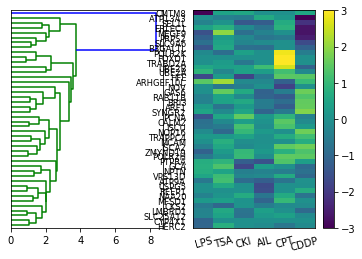

In [20]:
plt.subplot(1, 2, 1)
ylinkage =linkage(pdist(a, metric=metric), method=method, metric=metric)
ydendro = dendrogram(ylinkage, orientation='right', no_labels=True, distance_sort='descending')

a = a.ix[[a.index[i] for i in ydendro['leaves']]]

plt.subplot(1, 2, 2)
plt.imshow(a, aspect='auto', interpolation='none', vmin=-3.0, vmax=3.0)
plt.colorbar()
plt.xticks(range(a.shape[1]), a.columns, rotation=15)
plt.yticks(range(a.shape[0]), a.index, size='small')
plt.gca().xaxis.set_ticks_position('none')
plt.gca().yaxis.set_ticks_position('none')
plt.gca().invert_yaxis()

plt.show()

In [14]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

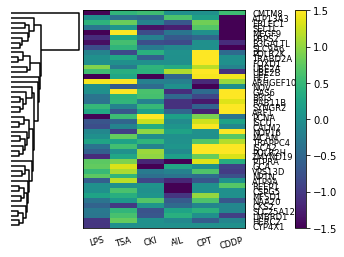

In [24]:
main_axes = plt.gca()
divider = make_axes_locatable(main_axes)

plt.sca(divider.append_axes("left", 1.0, pad=0))
ylinkage = linkage(pdist(a, metric=metric), method=method, metric=metric)
ydendro = dendrogram(ylinkage, orientation='right', no_labels=True, distance_sort='descending', link_color_func=lambda x: 'black')

plt.gca().set_axis_off()
a = a.ix[[a.index[i] for i in ydendro['leaves']]]

plt.sca(main_axes)
plt.imshow(a, aspect='auto', interpolation='none', vmin=-1.5, vmax=1.5)

plt.colorbar(pad=0.15)
plt.gca().yaxis.tick_right()
plt.xticks(range(a.shape[1]), a.columns, rotation=15, size='small')
plt.yticks(range(a.shape[0]), a.index, size='small')
plt.gca().xaxis.set_ticks_position('none')
plt.gca().yaxis.set_ticks_position('none')
plt.gca().invert_yaxis()

plt.show()

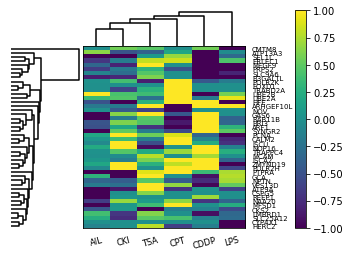

In [25]:
main_axes = plt.gca()
divider = make_axes_locatable(main_axes)
xdendro_axes = divider.append_axes("top", 0.5, pad=0)
ydendro_axes = divider.append_axes("left", 1.0, pad=0)

plt.sca(xdendro_axes)
xlinkage = linkage(pdist(a.T, metric=metric), method=method, metric=metric)
xdendro = dendrogram(xlinkage, orientation='top', no_labels=True,distance_sort='descending',link_color_func=lambda x: 'black')
plt.gca().set_axis_off()
a = a[[a.columns[i] for i in xdendro['leaves']]]

plt.sca(ydendro_axes)
ylinkage = linkage(pdist(a, metric=metric), method=method,metric=metric)
ydendro = dendrogram(ylinkage, orientation='right', no_labels=True, distance_sort='descending', link_color_func=lambda x: 'black')
plt.gca().set_axis_off()
a = a.ix[[a.index[i] for i in ydendro['leaves']]]

plt.sca(main_axes)
plt.imshow(a, aspect='auto', interpolation='none', vmin=-1.0, vmax=1.0)
plt.colorbar(pad=0.15)
plt.gca().yaxis.tick_right()
plt.xticks(range(a.shape[1]), a.columns, rotation=15, size='small')
plt.yticks(range(a.shape[0]), a.index, size='x-small')
plt.gca().xaxis.set_ticks_position('none')
plt.gca().yaxis.set_ticks_position('none')
plt.gca().invert_yaxis()

plt.show()

In [15]:
foldchange_up = foldchange[['CKI', 'TSA','CPT','CDDP']]

In [16]:
a = foldchange_up

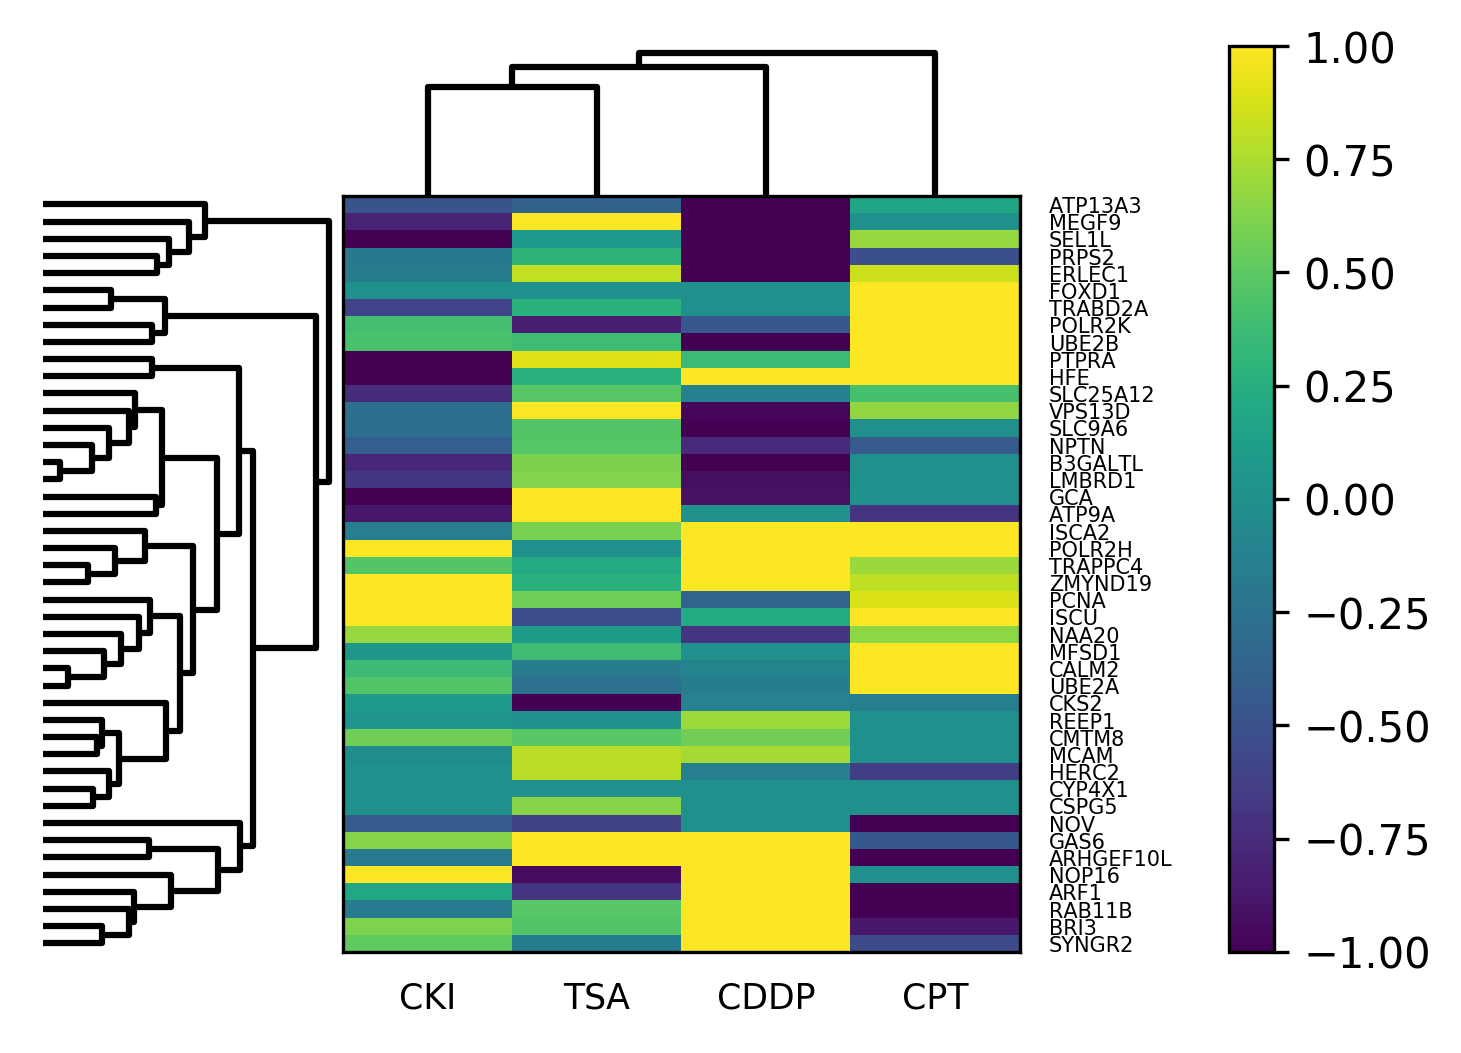

In [34]:
fig = plt.figure(dpi=300) 

main_axes = plt.gca()
divider = make_axes_locatable(main_axes)
xdendro_axes = divider.append_axes("top", 0.5, pad=0)
ydendro_axes = divider.append_axes("left", 1.0, pad=0)

plt.sca(xdendro_axes)
xlinkage = linkage(pdist(a.T, metric=metric), method=method, metric=metric)
xdendro = dendrogram(xlinkage, orientation='top', no_labels=True,distance_sort='descending',link_color_func=lambda x: 'black')
plt.gca().set_axis_off()
a = a[[a.columns[i] for i in xdendro['leaves']]]

plt.sca(ydendro_axes)
ylinkage = linkage(pdist(a, metric=metric), method=method,metric=metric)
ydendro = dendrogram(ylinkage, orientation='right', no_labels=True, distance_sort='descending', link_color_func=lambda x: 'black')
plt.gca().set_axis_off()
a = a.ix[[a.index[i] for i in ydendro['leaves']]]

plt.sca(main_axes)
plt.imshow(a, aspect='auto', interpolation='none', vmin=-1.0, vmax=1.0)
plt.colorbar(pad=0.15)
plt.gca().yaxis.tick_right()
plt.xticks(range(a.shape[1]), a.columns, size='small')
plt.yticks(range(a.shape[0]), a.index, size=5)
plt.gca().xaxis.set_ticks_position('none')
plt.gca().yaxis.set_ticks_position('none')
plt.gca().invert_yaxis()

plt.show()

In [17]:
heatmap_v1 = a 

In [18]:
heatmap_v1 = heatmap_v1.ix[:,['TSA','CPT','CDDP','CKI']]

For pubulishing, we make a heatmap of clustering with seaborn

In [19]:
import seaborn as sns

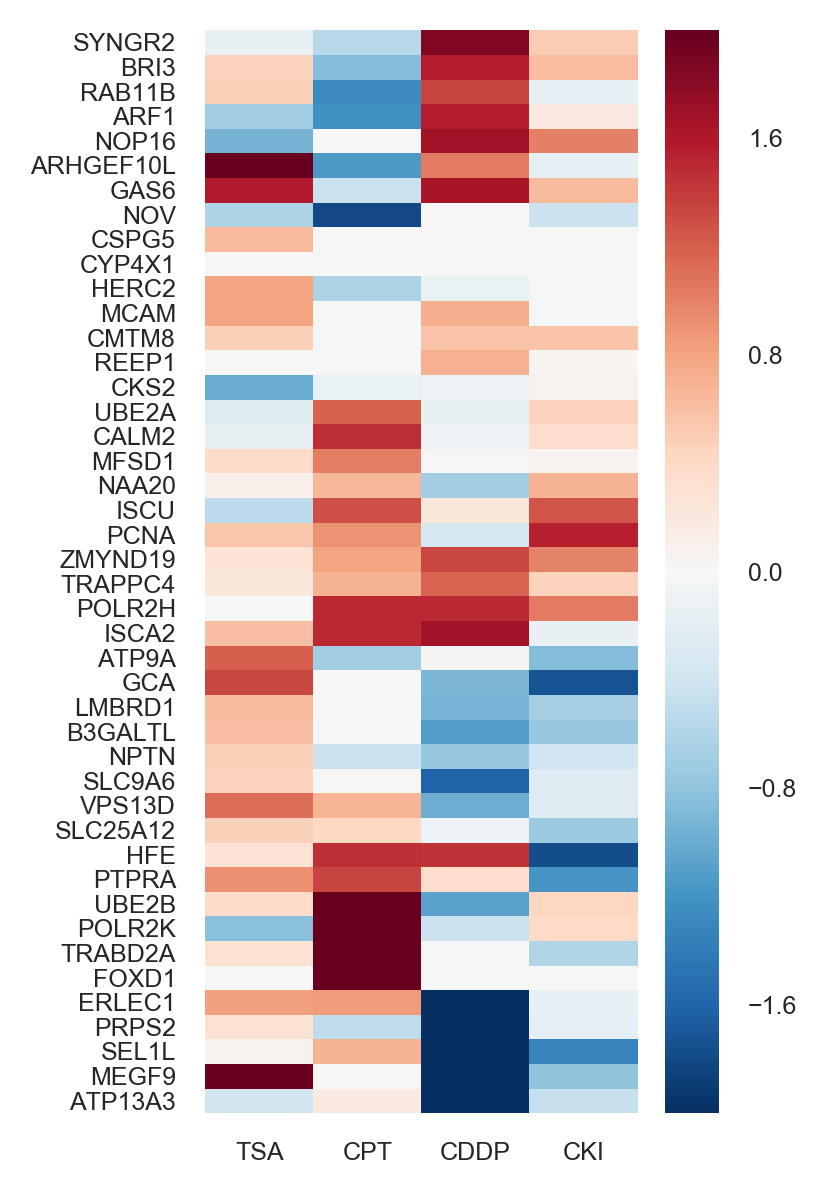

In [48]:
sns.set(font_scale=0.6)

fig = plt.figure(figsize =(2.7,4), dpi=300) 
sns_plot = sns.heatmap(heatmap_v1, vmin = -2, vmax = 2)

#sns_plot.set_xticklabels(sns_plot.get_xticklabels(), rotation = 45)

fig.tight_layout()

In [20]:
heatmap_v2 = heatmap_v1.ix[['NPTN','ATP9A','ATP13A3', 'MEGF9','SEL1L','PRPS2', 'ERLEC1', 'FOXD1', 'TRABD2A','POLR2K', 'SLC25A12', 'VPS13D', 'SLC9A6','B3GALTL', 'LMBRD1', 'GCA', 'UBE2B', 'PTPRA', 'HFE', 'ISCA2', 'POLR2H', 'TRAPPC4', 'ZMYND19', 'PCNA', 'ISCU', 'CMTM8', 'MCAM', 'MFSD1', 'CALM2', 'UBE2A', 'NAA20', 'REEP1', 'HERC2', 'CYP4X1', 'CSPG5', 'CKS2', 'NOV', 'GAS6', 'ARHGEF10L', 'NOP16', 'ARF1', 'RAB11B', 'BRI3', 'SYNGR2'],:]

In [51]:
heatmap_v2

,TSA,CPT,CDDP,CKI
NPTN,0.470597,-0.428254,-0.755651,-0.405722
ATP9A,1.187620,-0.695783,0.023987,-0.871629
ATP13A3,-0.376955,0.185001,-3.885320,-0.478379
MEGF9,1.976430,0.000000,-2.681810,-0.801453
SEL1L,0.070860,0.691892,-2.128810,-1.342540
PRPS2,0.302635,-0.511878,-2.492850,-0.190933
ERLEC1,0.818227,0.847384,-2.663310,-0.156714
FOXD1,0.000000,3.251950,0.000000,0.000000
TRABD2A,0.283493,3.828460,0.006575,-0.595041
POLR2K,-0.831832,2.880490,-0.447798,0.401128


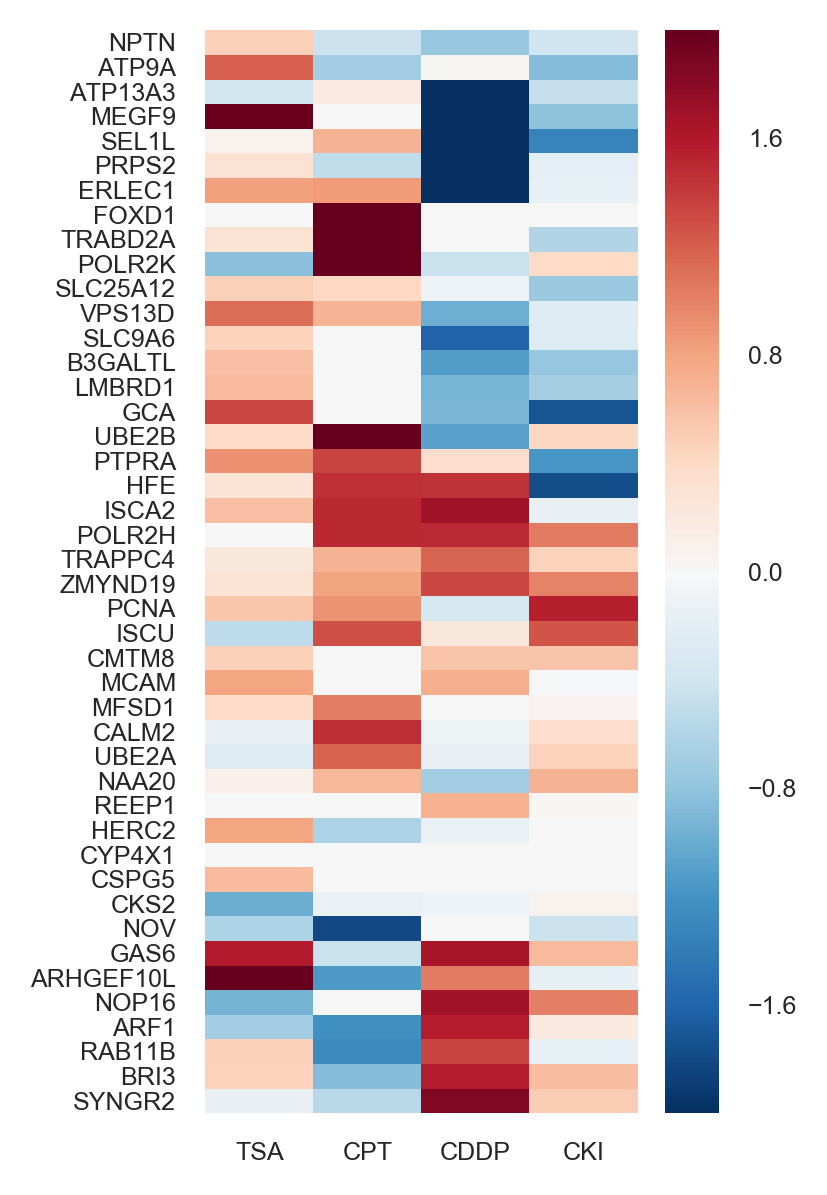

In [52]:
# default.

sns.set(font_scale=0.6)

fig = plt.figure(figsize =(2.7,4), dpi=300) 
sns_plot = sns.heatmap(heatmap_v2, vmin = -2, vmax = 2)

fig.tight_layout()

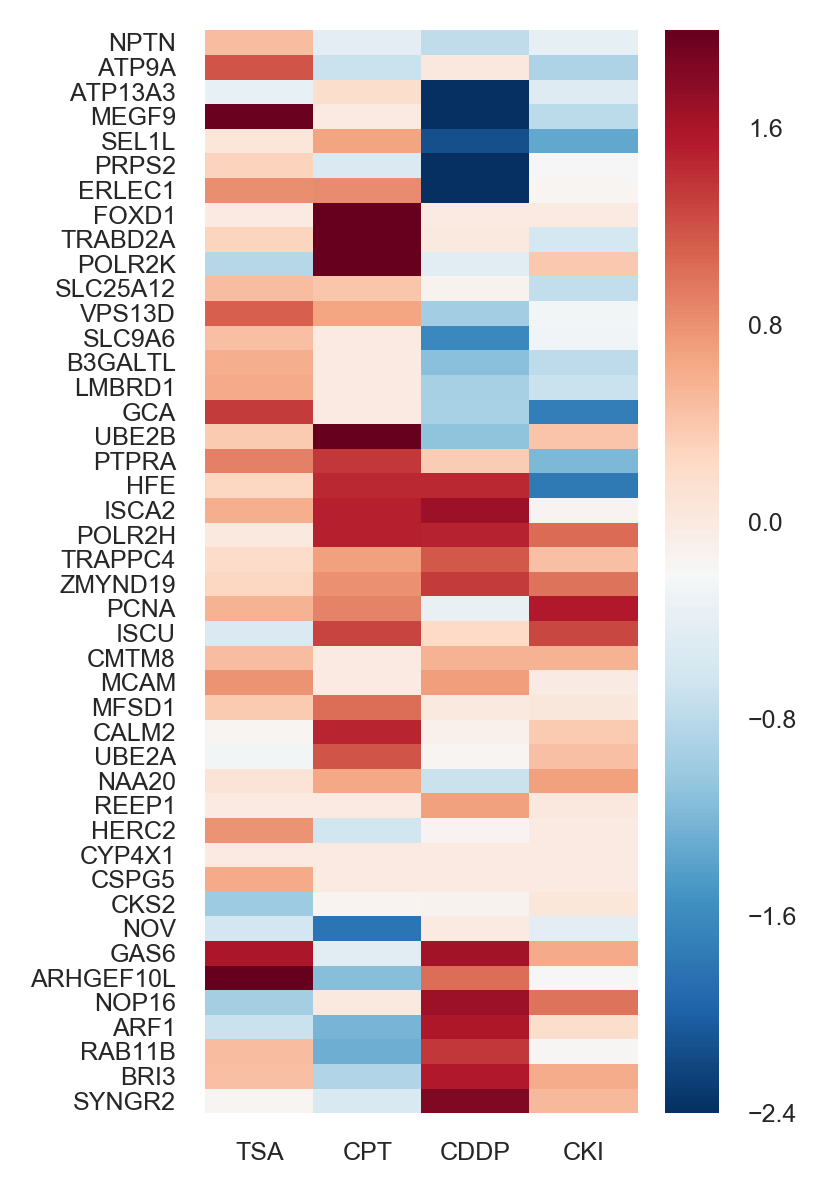

In [61]:
# center is set as -0.2

sns.set(font_scale=0.6)

fig = plt.figure(figsize =(2.7,4), dpi=300) 
sns_plot = sns.heatmap(heatmap_v2, vmin = -2, vmax = 2, center=-0.2)

#sns_plot.set_xticklabels(sns_plot.get_xticklabels(), rotation = 45)

fig.tight_layout()

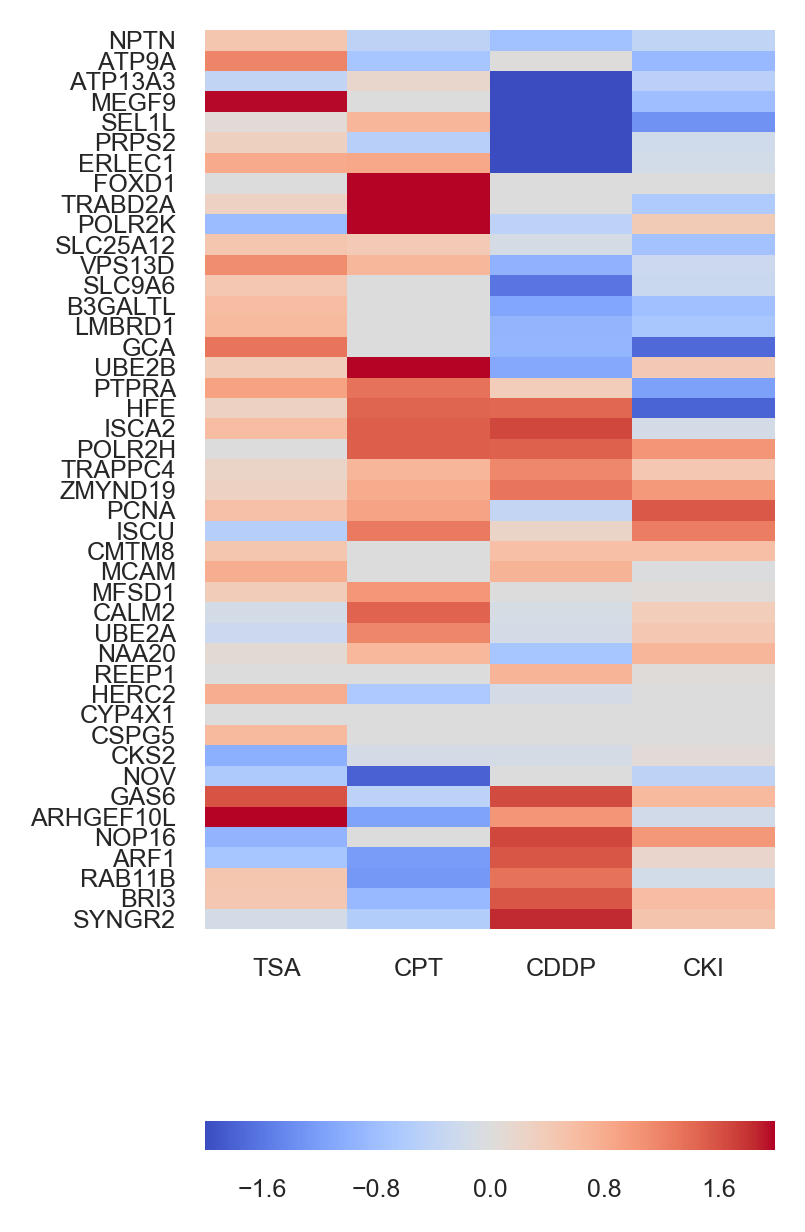

In [71]:
# default.

sns.set(font_scale=0.6)

fig = plt.figure(figsize =(2.7,4.5), dpi=300) 
sns_plot = sns.heatmap(heatmap_v2, vmin = -2, vmax = 2, cmap = 'coolwarm', cbar_kws={"orientation": "horizontal"})

fig.tight_layout()

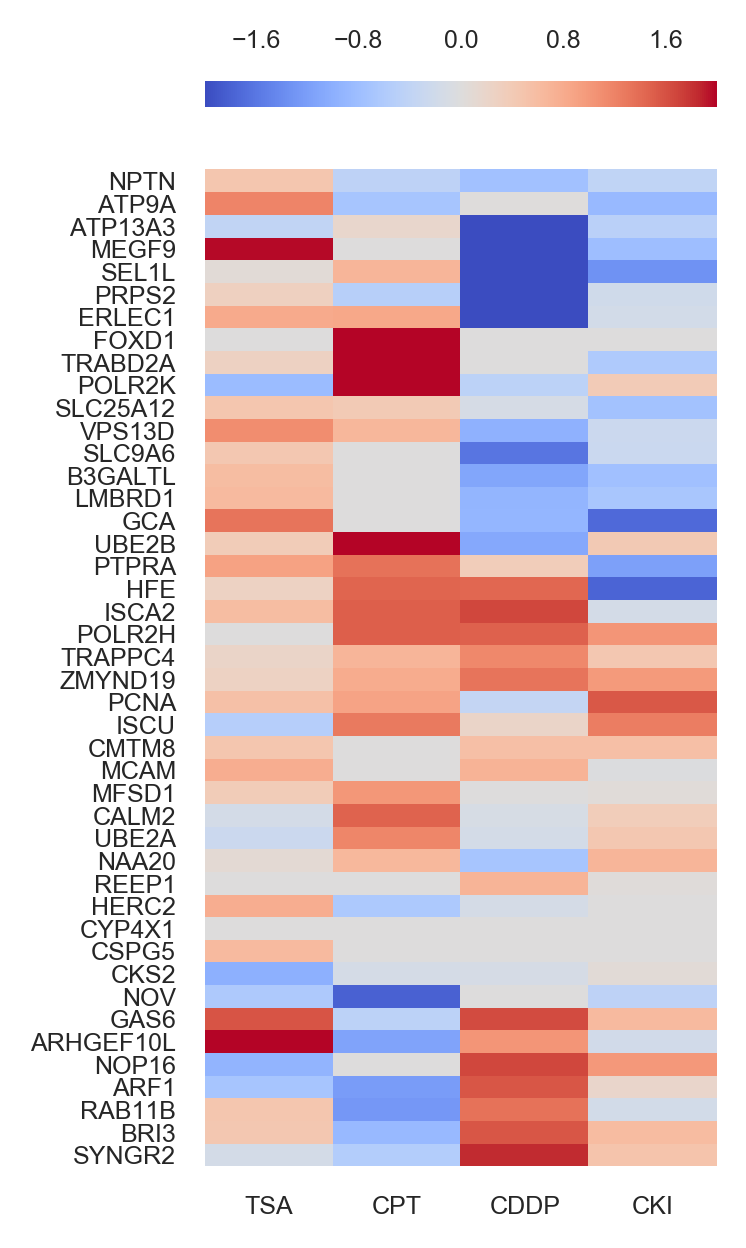

In [25]:
# default.

sns.set(font_scale=0.6)

fig = plt.figure(figsize =(2.2,5.5), dpi=300) 
sns_plot = sns.heatmap(heatmap_v2, vmin = -2, vmax = 2, cmap = 'coolwarm', cbar_kws=dict(use_gridspec=False,location="top"))

# fig.tight_layout()